In [141]:
import torch 
import os 

In [150]:
image_filelist = os.listdir('images')
print(image_filelist)
label_filelist = os.listdir('groud truth')
print(label_filelist)
filterlist = list(map(lambda x:''.join(x.replace('.jpg','_mask.png')),label_filelist))
print(filterlist)
image_filelist = list(map(lambda x:x.replace('_mask.png','.jpg'), list(set(filterlist)&set(label_filelist))))
print(image_filelist)
label_filelist = label_filelist
# for i in range(len(image_filelist)):
#     print(image_filelist[i],label_filelist[i])

['monge_1.jpg', 'monge_10.jpg', 'monge_101.jpg', 'monge_102.jpg', 'monge_103.jpg', 'monge_104.jpg', 'monge_105.jpg', 'monge_106.jpg', 'monge_107.jpg', 'monge_108.jpg', 'monge_11.jpg', 'monge_110.jpg', 'monge_111.jpg', 'monge_112.jpg', 'monge_114.jpg', 'monge_115.jpg', 'monge_117.jpg', 'monge_118.jpg', 'monge_119.jpg', 'monge_119bis.jpg', 'monge_12.jpg', 'monge_13.jpg', 'monge_14.jpg', 'monge_15.jpg', 'monge_16.jpg', 'monge_17.jpg', 'monge_18.jpg', 'monge_19.jpg', 'monge_2.jpg', 'monge_20.jpg', 'monge_21.jpg', 'monge_23.jpg', 'monge_24.jpg', 'monge_25.jpg', 'monge_26.jpg', 'monge_27.jpg', 'monge_28.jpg', 'monge_29.jpg', 'monge_29bis.jpg', 'monge_3.jpg', 'monge_30.jpg', 'monge_31.jpg', 'monge_32.jpg', 'monge_33.jpg', 'monge_34.jpg', 'monge_35.jpg', 'monge_36.jpg', 'monge_37.jpg', 'monge_38.jpg', 'monge_39.jpg', 'monge_4.jpg', 'monge_40.jpg', 'monge_41.jpg', 'monge_42.jpg', 'monge_43.jpg', 'monge_44.jpg', 'monge_45.jpg', 'monge_46.jpg', 'monge_47.jpg', 'monge_48.jpg', 'monge_5.jpg', 'mong

In [156]:
sorted(image_filelist),sorted(label_filelist)

(['monge_1.jpg',
  'monge_10.jpg',
  'monge_101.jpg',
  'monge_102.jpg',
  'monge_103.jpg',
  'monge_104.jpg',
  'monge_105.jpg',
  'monge_106.jpg',
  'monge_107.jpg',
  'monge_108.jpg',
  'monge_11.jpg',
  'monge_110.jpg',
  'monge_111.jpg',
  'monge_112.jpg',
  'monge_114.jpg',
  'monge_115.jpg',
  'monge_117.jpg',
  'monge_118.jpg',
  'monge_119.jpg',
  'monge_119bis.jpg',
  'monge_12.jpg',
  'monge_13.jpg',
  'monge_14.jpg',
  'monge_15.jpg',
  'monge_16.jpg',
  'monge_17.jpg',
  'monge_18.jpg',
  'monge_19.jpg',
  'monge_2.jpg',
  'monge_20.jpg',
  'monge_21.jpg',
  'monge_23.jpg',
  'monge_24.jpg',
  'monge_25.jpg',
  'monge_26.jpg',
  'monge_27.jpg',
  'monge_28.jpg',
  'monge_29.jpg',
  'monge_29bis.jpg',
  'monge_3.jpg',
  'monge_30.jpg',
  'monge_31.jpg',
  'monge_32.jpg',
  'monge_33.jpg',
  'monge_34.jpg',
  'monge_35.jpg',
  'monge_36.jpg',
  'monge_37.jpg',
  'monge_38.jpg',
  'monge_39.jpg',
  'monge_4.jpg',
  'monge_40.jpg',
  'monge_41.jpg',
  'monge_42.jpg',
  'monge_

In [205]:
from torch.utils import data
from PIL import Image
import numpy as np
import torch 
class EcpDataset(data.Dataset):
    def __init__(self,root,type = 'train',transform = True):
        self.root = root
        self._transform = transform
        self.files = None
        self.labels = None
        self.label_dict = {
            0:0,
            29:1,
            67:2,  
            76:3, 
            128:4, 
            149:5, 
            217:6,
            225:7
        }
        image_filelist = os.listdir('images')
        label_filelist = os.listdir('groud truth')
        filterlist = list(map(lambda x:''.join(x.replace('.jpg','_mask.png')),label_filelist))
        self.image_filelist = list(map(lambda x:x.replace('_mask.png','.jpg'), list(set(filterlist)&set(label_filelist))))
    def __len__(self):
        return len(self.image_filelist)
    def __getitem__(self,index):
        img_path = 'images/'+self.image_filelist[index]
        lbl_path = 'groud truth/'+self.image_filelist[index].replace('.jpg','_mask.png')
        img = np.array(Image.open(img_path))
        lbl = self.process_label(lbl_path)
        img = torch.from_numpy(img).float()
        label = torch.from_numpy(lbl).float()
        return img,lbl
    def process_label(self,lbl_filename):
        label = np.array(Image.open(lbl_filename).convert('L'))
        relabel = np.zeros([label.shape[0],label.shape[1]])
        for i in range(label.shape[0]):
            for j in range(label.shape[1]):
#                 print(label[i,j])
                relabel[i,j] = 8 if label[i,j] not in list(self.label_dict.keys()) else self.label_dict[label[i,j]] 
        return relabel
gg = EcpDataset('/')
img,lbl = gg[0]

monge_115.jpg


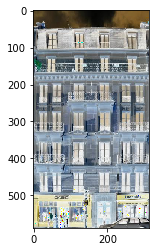

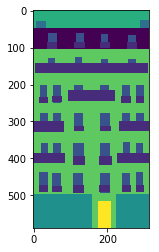

In [206]:
print(gg.image_filelist[0])
imgtemp = img.numpy()
plt.imshow(imgtemp)
plt.show()
plt.imshow(lbl)
plt.show()

[137 172 226]
[137 172 226]


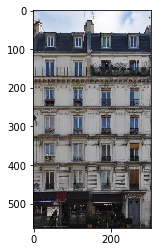

In [213]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# import torc
# import matplotlib.image as mpimg
cc = np.array(Image.open('images/monge_101.jpg'))
print(cc[0][0])
# cc = mpimg.imread('groud truth/monge_101_mask.png')
cc = torch.from_numpy(cc).type(torch.FloatTensor)
cc = cc.numpy().astype('uint8')
print(cc[0][0])
plt.imshow(cc)
plt.show()

In [184]:
cc = Image.open('groud truth/monge_1_mask.png')
cc = np.array(cc.convert('L'))
np.unique(cc)


array([  0,  29,  67,  76, 128, 149, 151, 217, 225], dtype=uint8)

In [188]:
import torch
torch.Tensor().type

In [186]:
c = {1:2}
c.keys()

dict_keys([1])

In [77]:
imageset = set(list(gg))
labelset = set(label_filelist)

In [159]:
tuple([1,2,3])

(1, 2, 3)

In [158]:
np.zeros([2,3])

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [127]:
# cc = {(0,128,255):1}
for i in cc:
    for j in i:
        print(i)
    break

[[128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 255]
 [128 255 